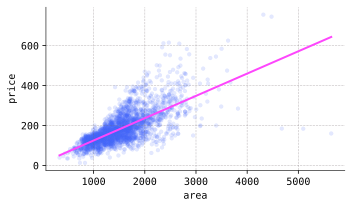

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib_inline.backend_inline
import seaborn as sns
import scipy as sp
from itertools import product
import warnings
plt.style.use('./aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

# linear regression example begins below

# import linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# import data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])

# pull out the 'area' column and 'price column from the data and convert them to numpy arrays
X = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy()

# instantiate a linear regression model
model = LinearRegression()

# train the model
model.fit(X=X, y=y)

# get the learned parameters
beta, beta_0 = model.coef_, model.intercept_

# build a grid for the regression line
grid = np.linspace(X.min(), X.max())

# plot the regression line
plt.plot(grid, beta * grid + beta_0, color=magenta)

# plot the data
plt.scatter(x=X, y=y, alpha=0.15)

plt.xlabel('area')
plt.ylabel('price')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

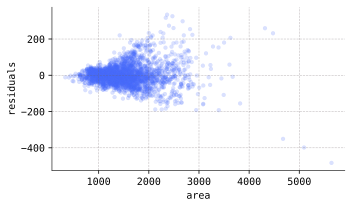

In [400]:
# get the predictions
y_hat = model.predict(X=X)

# get the residuals
resid = y - y_hat

# plot the residuals vs. area
plt.scatter(x=X, y=resid, alpha=0.20)

plt.xlabel('area')
plt.ylabel('residuals')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

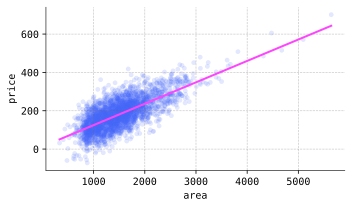

In [401]:
# import statsmodels
import statsmodels.formula.api as smf

# instantiate and train a linear regression model from statsmodels
model = smf.ols(formula='price ~ area', data=df).fit()

# get the learned standard deviation
sigma = np.sqrt(model.scale)

# generate the dataset
np.random.seed(42)
y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})

# plot the dataset
df_gen.plot(kind='scatter', x='area', y='price', alpha=0.15)

# plot the original regression line
plt.plot(grid, beta_0 + beta * grid, color=magenta)

plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

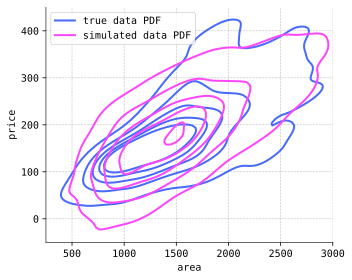

In [402]:
df['indicator'] = 'true data PDF'
df_gen['indicator'] = 'simulated data PDF'
df_combined = pd.concat(objs=[df, df_gen], axis=0)

g = sns.kdeplot(data=df_combined, x='area', y='price', hue='indicator', levels=6)
g.get_legend().set_title(None)
sns.move_legend(obj=g, loc='upper left')
plt.xlim(250, 3000)
plt.ylim(-50, 450)
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

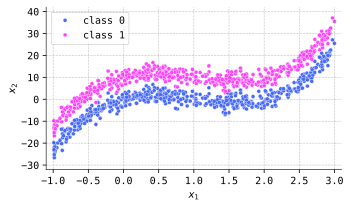

In [403]:
# import the data
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-01.csv'
df = pd.read_csv(url)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-1.1, 3.1)
plt.ylim(-32, 42)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

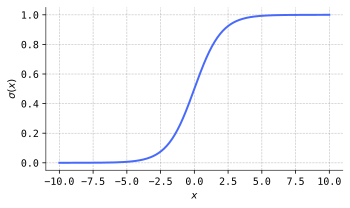

In [404]:
import torch
import torch.nn.functional as F

grid = torch.linspace(start=-10, end=10, steps=300)
plt.plot(grid, F.sigmoid(grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.tight_layout()

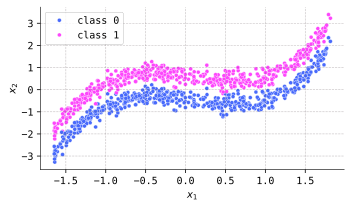

In [405]:
# import scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# convert the data to numpy arrays
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()

# scale the input data
ss = StandardScaler()
X = ss.fit_transform(X=X)

# replaced the columns of the dataframe with the transformed data
df['x_1'] = X[:, 0]
df['x_2'] = X[:, 1]

# plot the scaled data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

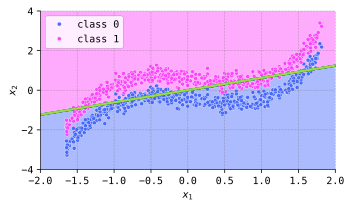

In [406]:
# import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression model
model = LogisticRegression()

# train the model
model.fit(X=X, y=y)

# define the decision boundary plotter
def decision_boundary(model, data, resolution, x_1, x_2, type):

    # define grid
    grid_1, grid_2 = np.meshgrid(np.linspace(*x_1, resolution), np.linspace(*x_2, resolution))
    grid = np.column_stack((grid_1.reshape((resolution ** 2, -1)), grid_2.reshape((resolution ** 2, -1))))

    # apply the fitted model to the grid
    if type == 'np':
        z = model.predict(grid)
    else:
        grid = torch.tensor(data=grid, dtype=torch.float32)
        z = (model(grid) >= 0.5).to(torch.int32)
        
    # plot the decision boundary and colors
    z = z.reshape((resolution, resolution))
    cmap = clr.LinearSegmentedColormap.from_list('custom', [blue, magenta], N=2)
    plt.contourf(grid_1, grid_2, z, cmap=cmap, alpha=0.45)
    plt.contour(grid_1, grid_2, z)

    # plot the data
    g = sns.scatterplot(data=data, x='x_1', y='x_2', hue='y')

    # change the default seaborn legend
    g.legend_.set_title(None)
    new_labels = ['class 0', 'class 1']
    for t, l in zip(g.legend_.texts, new_labels):
        t.set_text(l)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.gcf().set_size_inches(w=5, h=3)
    plt.tight_layout()

# parameters for decision boundary plot
resolution = 1000
x_1 = (-2, 2)
x_2 = (-4, 4)

# plot the decision boundary
decision_boundary(model=model, data=df, resolution=1000, x_1=x_1, x_2=x_2, type='np')

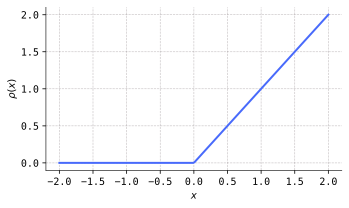

In [407]:
relu_grid = torch.linspace(start=-2, end=2, steps=200)
plt.plot(relu_grid, F.relu(relu_grid))
plt.gcf().set_size_inches(w=5, h=3)
plt.xlabel('$x$')
plt.ylabel('$\\rho(x)$')
plt.tight_layout()

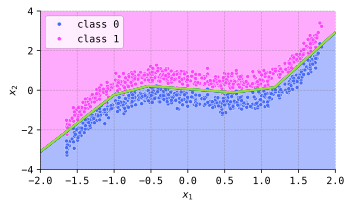

In [408]:
# convert the data to torch tensors
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# define the neural network model architecture
torch.manual_seed(42)
k = 8 # width of hidden layer
model = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=k),
                            torch.nn.ReLU(),
                            torch.nn.Linear(in_features=k, out_features=1),
                            torch.nn.Sigmoid())

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=5e-1)

# train the model
num_epochs = 1750
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = model(X)
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

# plot the decision boundary
decision_boundary(model=model, data=df, resolution=1000, x_1=x_1, x_2=x_2, type='torch')

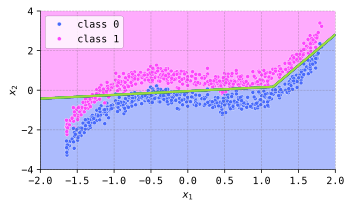

In [409]:
# define the neural network model architecture
torch.manual_seed(42)
k = 2 # width of hidden layer
model = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=k),
                            torch.nn.ReLU(),
                            torch.nn.Linear(in_features=k, out_features=1),
                            torch.nn.Sigmoid())

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=5e-1)

# train the model
num_epochs = 1750
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = model(X)
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

# plot the decision boundary
decision_boundary(model=model, data=df, resolution=1000, x_1=x_1, x_2=x_2, type='torch')

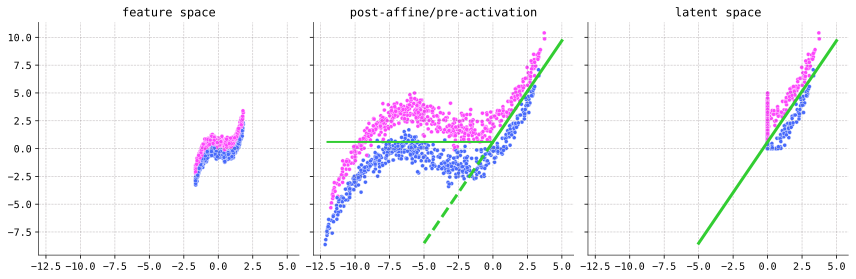

In [447]:
# grab the parameters from the trained model
parameters = {}
names = ['weight1', 'bias1', 'weight2', 'bias2']
for name, parameter in zip(names, model.parameters()):
    parameters = parameters | {name: parameter.data}
parameters['weight1'] = parameters['weight1'].T
parameters['weight2'] = parameters['weight2'].T

# define the affine transformation and transform the data using the learned parameters
def affine_trans(X, weight, bias):
    return X @ weight + bias
X_trans = affine_trans(X=X, weight=parameters['weight1'], bias=parameters['bias1'])

# copy the transformed data into a new dataframe
df_trans = df.copy()
df_trans['x_1'] = X_trans[:, 0]
df_trans['x_2'] = X_trans[:, 1]

# grab the parameters used to define the decision line in latent space
w_1, w_2 = parameters['weight2'].squeeze().tolist()
b = parameters['bias2'].item()

# define the function used to draw the decision line in latent space
def decision_line(x_1, w, b):
    w_1, w_2 = w
    return -(w_1 / w_2) * x_1 - b / w_2

_, axes = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)

# plot the data
g = sns.scatterplot(data=df, x='x_1', y='x_2', hue='y', ax=axes[0], legend=False)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].set_title('feature space')

# plot the transformed data before ReLU
g = sns.scatterplot(data=df_trans, x='x_1', y='x_2', hue='y', ax=axes[1], legend=False)
axes[1].plot([-12, 0], [-b / w_2, -b / w_2], color='limegreen')
axes[1].plot([-5, 0], [decision_line(-5, w=[w_1, w_2], b=b), -b / w_2], color='limegreen', linestyle='--', linewidth=3)
axes[1].plot([0, 5], [-b / w_2, decision_line(5, w=[w_1, w_2], b=b)], color='limegreen', linewidth=3)
axes[1].set_xlabel(None)
axes[1].set_title('post-affine/pre-activation')

# apply ReLU
X_trans = F.relu(X_trans)
df_trans['x_1'] = X_trans[:, 0]
df_trans['x_2'] = X_trans[:, 1]

# plot the fully transformed data after the affine transformation and ReLU
g = sns.scatterplot(data=df_trans, x='x_1', y='x_2', hue='y', ax=axes[2], legend=False)
axes[2].plot([-5, 5], [decision_line(-5, w=[w_1, w_2], b=b), decision_line(5, w=[w_1, w_2], b=b)], color='limegreen', linewidth=3)
axes[2].set_xlabel(None)
axes[2].set_title('latent space')

plt.tight_layout()

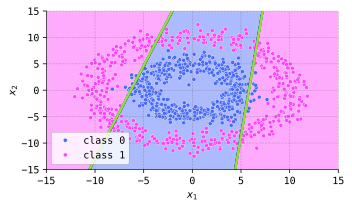

In [394]:
df = pd.read_csv('./aux-files/circle.csv')
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# convert the data to torch tensors
X = torch.tensor(data=X, dtype=torch.float32)
y = torch.tensor(data=y, dtype=torch.float32)

# define the neural network model architecture
torch.manual_seed(42)
k = 2 # width of hidden layer
model = torch.nn.Sequential(torch.nn.Linear(in_features=2, out_features=k),
                            torch.nn.ReLU(),
                            torch.nn.Linear(in_features=k, out_features=1),
                            torch.nn.Sigmoid())

# define the loss function and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=5e-1)

# train the model
num_epochs = 1750
for _ in range(num_epochs):
    optimizer.zero_grad()
    y_hat = model(X)
    loss = loss_fn(y_hat.squeeze(), y)
    loss.backward()
    optimizer.step()

# parameters for decision boundary plot
resolution = 1000
x_1 = (-15, 15)
x_2 = (-15, 15)

# plot the decision boundary
decision_boundary(model=model, data=df, resolution=resolution, x_1=x_1, x_2=x_2, type='torch')

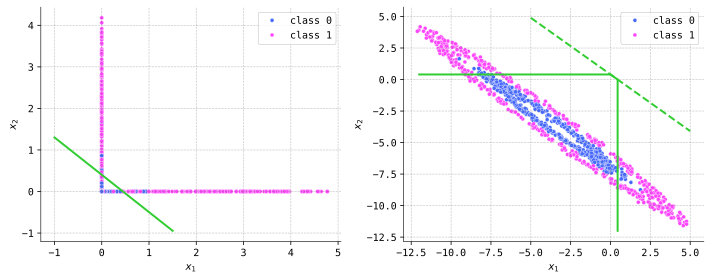

In [395]:
# grab the parameters from the trained model
parameters = {}
names = ['weight1', 'bias1', 'weight2', 'bias2']
for name, parameter in zip(names, model.parameters()):
    parameters = parameters | {name: parameter.data}
parameters['weight1'] = parameters['weight1'].T
parameters['weight2'] = parameters['weight2'].T

# define the affine transformation and transform the data using the learned parameters
def affine_trans(X, weight, bias):
    return X @ weight + bias
X_trans = affine_trans(X=X, weight=parameters['weight1'], bias=parameters['bias1'])

# copy the transformed data into a new dataframe
df_trans = df.copy()
df_trans['x_1'] = X_trans[:, 0]
df_trans['x_2'] = X_trans[:, 1]

# grab the parameters used to define the decision line in latent space
w_1, w_2 = parameters['weight2'].squeeze().tolist()
b = parameters['bias2'].item()

# define the function used to draw the decision line in latent space
def decision_line(x_1, w, b):
    w_1, w_2 = w
    return -(w_1 / w_2) * x_1 - b / w_2

_, axes = plt.subplots(ncols=2, figsize=(10, 4))

# plot the transformed data before ReLU
g = sns.scatterplot(data=df_trans, x='x_1', y='x_2', hue='y', ax=axes[1])
axes[1].plot([-12, 0, -b / w_1, -b / w_1], [-b / w_2, -b / w_2, 0, -12], color='limegreen')
axes[1].plot([-5, 5], [decision_line(-5, w=[w_1, w_2], b=b), decision_line(5, w=[w_1, w_2], b=b)], color='limegreen', linestyle='--')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

# apply ReLU
X_trans = F.relu(X_trans)
df_trans['x_1'] = X_trans[:, 0]
df_trans['x_2'] = X_trans[:, 1]

# plot the fully transformed data after the affine transformation and ReLU
g = sns.scatterplot(data=df_trans, x='x_1', y='x_2', hue='y', ax=axes[0])
axes[0].plot([-1, 1.5], [decision_line(-1, w=[w_1, w_2], b=b), decision_line(1.5, w=[w_1, w_2], b=b)], color='limegreen')
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')

# change the default seaborn legend
g.legend_.set_title(None)
new_labels = ['class 0', 'class 1']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.tight_layout()

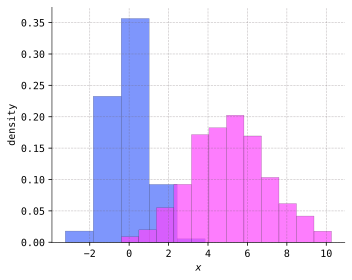

In [396]:
np.random.seed(42)
class_0 = sp.stats.norm(loc=0, scale=1).rvs(size=512)
class_1 = sp.stats.norm(loc=5, scale=2).rvs(size=512)

X = np.concatenate((class_0, class_1))
X = X.reshape(-1, 1)

plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True)
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True)
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

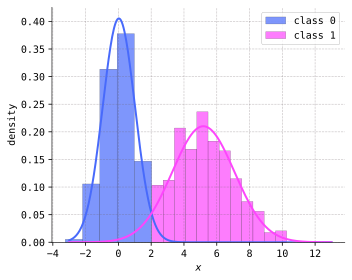

In [397]:
# import gaussian mixture model from scikit-learn
from sklearn.mixture import GaussianMixture

# import data and convert to numpy array
url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/ch10-book-data-02.csv'
df = pd.read_csv(url)
X = df['x'].to_numpy().reshape(-1, 1)

# instantiate the model, fit it to the data, predict components
gmm = GaussianMixture(n_components=2, random_state=42)
z_hat = gmm.fit_predict(X=X)

# cluster the data based on predicted components
class_0 = X[z_hat == 0]
class_1 = X[z_hat == 1]

# pull out the learned parameters
means = gmm.means_
std = np.sqrt(gmm.covariances_)

# define gaussian random variables based on learned parameters
comp_0 = sp.stats.norm(loc=means[0][0], scale=std[0][0][0])
comp_1 = sp.stats.norm(loc=means[1][0], scale=std[1][0][0])

# plot the gaussian density curves
grid = np.linspace(-3, 13, num=300)
plt.plot(grid, comp_0.pdf(grid))
plt.plot(grid, comp_1.pdf(grid))

# plot the data with component labels
plt.hist(x=class_0, alpha=0.7, ec='black', bins=5, density=True, color=blue, label='class 0')
plt.hist(x=class_1, alpha=0.7, ec='black', bins=12, density=True, color=magenta, label='class 1')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('density')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()